# Tanmay Garg
## CS20BTECH11063
## Deep Learning Assignment 1

In [100]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import math
import torch.functional as F
import torch.nn as nn


# Q1

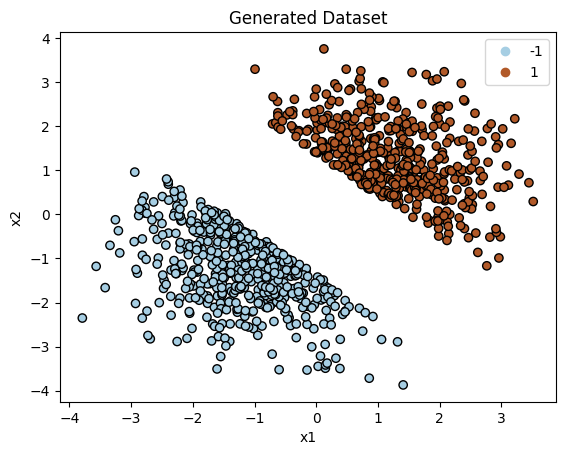

Percentage of -1 labels:  0.511
Percentage of 1 labels:  0.489


In [101]:
# Create a Linearly separable 2D dataset

# Use a different function to generate the dataset
def create_dataset(n=100, gamma=0.1):
    x = torch.randn(n, 2)
    y = torch.zeros(n)
    
    # for i in range(n):
    #     y[i] = 1 if x[i, 0] + gamma * x[i, 1] > 0 else -1
    # return x, y
    
    # Random initialize the weights and bias
    w = torch.randn(2)
    b = torch.randn(1)
    
    # Create the Dataset
    y = torch.sign(torch.matmul(x, w) + b)
    y[np.random.rand(n) < gamma] *= -1
    return x, y

def create_dataset_2(n=100, gamma=1):
    x = torch.randn(n, 2)
    y = torch.zeros(n)

    # Random initialize the weights and bias
    w = np.random.rand(2)
    
    # Create the Dataset
    y = torch.sign(torch.matmul(x, torch.Tensor(w)))
    
    # Angle of the line
    theta = np.arctan(w[1]/w[0])
    
    # apply the separability factor and point shifter to separate data based on separability factor and angle of the line
    point_shifter = np.array([np.cos(theta), np.sin(theta)])
    
    x = x.numpy()
    x[y==1] = x[y==1] + (gamma-1) * point_shifter
    x[y==-1] = x[y==-1] - (gamma-1) * point_shifter
    
    return torch.Tensor(x), y

# Plot the scatter plot with legend
x, y = create_dataset_2(1000, 2)

scatter = plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
xmin, xmax, ymin, ymax = plt.axis()
plt.title("Generated Dataset")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(handles=scatter.legend_elements()[0], labels=["-1", "1"])
plt.show()


# print frequency percentage of labels
print("Percentage of -1 labels: ", (y == -1).sum().item() / len(y))
print("Percentage of 1 labels: ", (y == 1).sum().item() / len(y))

In [102]:
# split dataset into train and test
def split_dataset(x, y, train_ratio=0.8):
    n = len(x)
    train_size = int(train_ratio * n)
    x_train = x[:train_size]
    y_train = y[:train_size]
    x_test = x[train_size:]
    y_test = y[train_size:]
    return x_train, y_train, x_test, y_test

# x_train, y_train, x_test, y_test = split_dataset(x, y, 0.8)


In [103]:
# Append 1 to x for bias
x = torch.cat((x, torch.ones(x.shape[0], 1)), dim=1)
print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)
# print(x)

Shape of x:  torch.Size([1000, 3])
Shape of y:  torch.Size([1000])


In [104]:
# Perceptron Training Algorithm
def perceptron_train(x, y, max_epochs=100):
    w = torch.zeros(3)
    k = 0
    for epoch in range(max_epochs):
        nb_changes = 0
        for i in range(x.size(0)):
            if x[i].dot(w) * y[i] <= 0:
                w = w + y[i] * x[i]
                nb_changes = nb_changes + 1
        if nb_changes == 0:
            # print('Stopping at Epoch: ', epoch) 
            break
        k = k + 1
    # print('Number of changes: ', nb_changes)
    
    # return the weights and number of epochs
    return w, k

In [105]:
w, max_epochs_run = perceptron_train(x, y, 100)
print("W = ", w, " Max Epochs Run = ", max_epochs_run)

W =  tensor([2.7218, 2.2299, 0.0000])  Max Epochs Run =  1


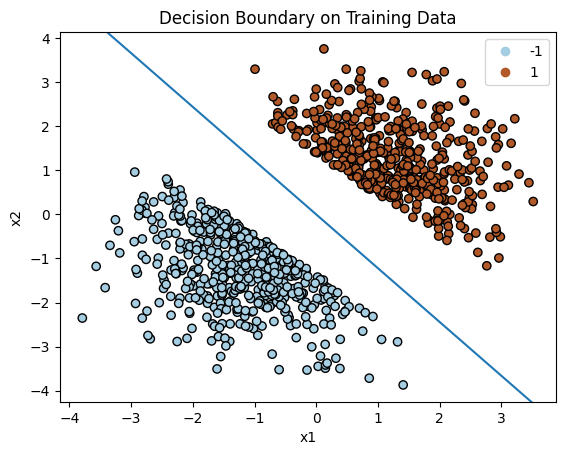

Accuracy =  100.0 %


In [106]:
# plot the decision boundary on data
x1 = np.linspace(-5, 5, 100)
x2 = -(w[0] * x1 + w[2]) / w[1]
plt.plot(x1, x2)

scatter = plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.ylim(ymin, ymax)
plt.xlim(xmin, xmax)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary on Training Data")
plt.legend(handles=scatter.legend_elements()[0], labels=["-1", "1"])
plt.show()

# print accuracy on test data
y_pred = torch.sign(x @ w)
print("Accuracy = ", (torch.sum(y_pred == y) / y.shape[0]).item() * 100, "%")


Gamma: 0.100000, Accuracy: 0.772000, Avg. Epochs: 100.000000
Gamma: 0.200000, Accuracy: 0.565000, Avg. Epochs: 100.000000
Gamma: 0.300000, Accuracy: 0.638000, Avg. Epochs: 100.000000
Gamma: 0.400000, Accuracy: 0.506000, Avg. Epochs: 100.000000
Gamma: 0.500000, Accuracy: 0.475000, Avg. Epochs: 100.000000
Gamma: 0.600000, Accuracy: 0.523000, Avg. Epochs: 100.000000
Gamma: 0.700000, Accuracy: 0.540000, Avg. Epochs: 100.000000
Gamma: 0.800000, Accuracy: 0.660000, Avg. Epochs: 100.000000
Gamma: 0.900000, Accuracy: 0.823000, Avg. Epochs: 100.000000
Gamma: 1.000000, Accuracy: 0.998000, Avg. Epochs: 53.600000
Gamma: 1.100000, Accuracy: 0.997000, Avg. Epochs: 39.400000
Gamma: 1.200000, Accuracy: 0.996000, Avg. Epochs: 46.400000
Gamma: 1.300000, Accuracy: 0.992000, Avg. Epochs: 47.600000
Gamma: 1.400000, Accuracy: 0.998000, Avg. Epochs: 26.600000
Gamma: 1.500000, Accuracy: 0.995000, Avg. Epochs: 32.200000
Gamma: 1.600000, Accuracy: 0.999000, Avg. Epochs: 39.200000
Gamma: 1.700000, Accuracy: 0.99

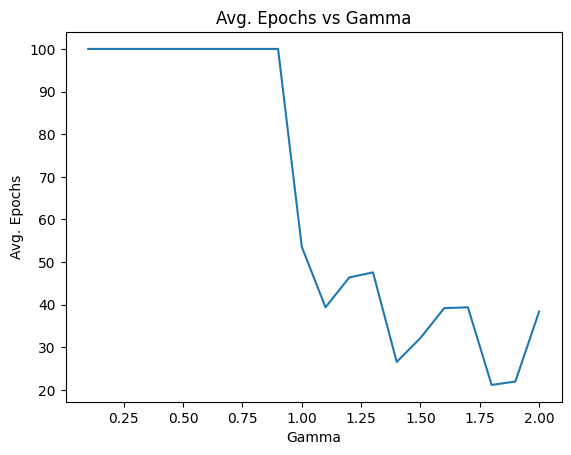

In [118]:
# Running the perceptron training algorithm for different values of gamma for multiple trials
num_trials = 5
gamma_val = []
k_val = []
for gamma in np.linspace(0.1, 2, 20):
    acc = 0
    k_avg = 0
    for i in range(num_trials):
        x, y = create_dataset(1000, gamma)
        
        # split dataset into train and test
        x_train, y_train, x_test, y_test = split_dataset(x, y, 0.8)
        # x = x_train
        # y = y_train
        
        x_train = torch.cat((x_train, torch.ones(x_train.shape[0], 1)), dim=1)
        w, k = perceptron_train(x_train, y_train, 100)
        k_avg = k_avg + k
        
        x_test = torch.cat((x_test, torch.ones(x_test.shape[0], 1)), dim=1)
        y_pred = torch.sign(x_test @ w)
        acc = acc + torch.sum(y_pred == y_test) / y_test.shape[0]
        
        # print('-----------------------------------------------')
    k_avg = k_avg / num_trials
    gamma_val.append(gamma)
    k_val.append(k_avg)
    print('Gamma: %f, Accuracy: %f, Avg. Epochs: %f' % (gamma, acc / num_trials, k_avg))
    
    # print('-----------------------------------------------')
    
plt.plot(gamma_val, k_val)
plt.xlabel('Gamma')
plt.ylabel('Avg. Epochs')
plt.title('Avg. Epochs vs Gamma')
plt.show()

We can see that as the value of $\gamma$ increases, the average number of epochs required to converge decreases. This is because as $\gamma$ increases, the data becomes more and more linearly separable and hence the number of epochs required to converge decreases. 

The variation in average epochs with higher values of $\gamma$ is due to the fact that each iteration a random sample is being generated and hence the number of epochs do not decrease uniformly.

# Q2

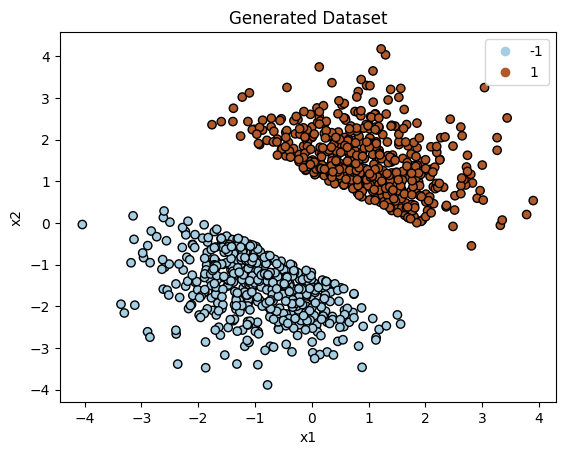

Percentage of -1 labels:  0.493
Percentage of 1 labels:  0.507


In [108]:
# Create a Linearly separable 2D dataset
x, y = create_dataset_2(1000, 2)
scatter = plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
xmin, xmax, ymin, ymax = plt.axis()
plt.legend(handles=scatter.legend_elements()[0], labels=["-1", "1"])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Generated Dataset")
plt.show()

print("Percentage of -1 labels: ", (y == -1).sum().item() / len(y))
print("Percentage of 1 labels: ", (y == 1).sum().item() / len(y))

In [109]:
x_train, y_train, x_test, y_test = split_dataset(x, y, 0.8)

# Append 1 to x for bias
x = torch.cat((x, torch.ones(x.shape[0], 1)), dim=1)
print("Shape of x: ", x.shape)
print("Shape of y: ", x.shape)

Shape of x:  torch.Size([1000, 3])
Shape of y:  torch.Size([1000, 3])


In [110]:
# Gradient Descent Algorithm for Hinge Loss
def hinge_gradient_descent(x, y, lr=0.1, max_epochs=100):
    w = torch.zeros(3)
    k = 0
    for epoch in range(max_epochs):
        nb_changes = 0
        for i in range(x.size(0)):
            if x[i].dot(w) * y[i] < 1:
                w = w + lr * (y[i]*x[i])
                nb_changes = nb_changes + 1
        if nb_changes == 0:
            # print('Stopping at Epoch: ', epoch) 
            break
        k = k + 1
    # print('Number of changes: ', nb_changes)
    
    # return the weights and number of epochs
    return w, k

# Gradient Descent Algorithm for Log Loss
# def log_loss_gradient_descent(x, y, lr=0.1, max_epochs=100):
#     w = torch.zeros(3)
#     k = 0
#     for epoch in range(max_epochs):
#         nb_changes = 0
#         for i in range(x.size(0)):
#             if x[i].dot(w) * y[i] < 1:
#                 w = w + lr * (y[i]*x[i]) / (1 + torch.exp(y[i]*x[i].dot(w)))
#                 nb_changes = nb_changes + 1
#         if nb_changes == 0:
#             # print('Stopping at Epoch: ', epoch) 
#             break
#         k = k + 1
#     # print('Number of changes: ', nb_changes)
    
#     # return the weights and number of epochs
#     return w, k

def log_loss_gradient_descent(x, y, lr=0.1, max_epochs=100):
    w = torch.zeros(3)
    k = 0
    for epoch in range(max_epochs):
        nb_changes = 0
        dL_dw = torch.zeros(3)
        for i in range(x.size(0)):
            y_pred = 1/(1 + torch.exp(-x[i].dot(w)))
            dL_dw += (y_pred - y[i]) * x[i]            
            # if np.linalg.norm(dL_dw) < 1e-4:
            #     break
        w = w - (lr * dL_dw)/x.size(0)
        k = k + 1
    # print('Number of changes: ', nb_changes)
    
    # return the weights and number of epochs
    return w, k


Log loss is a loss function used for classification problems. It is defined as:

$$
\begin{align*}
\mathcal{L}(\hat{y}, y) = -\frac{1}{N}\sum_{i=1}^{N}y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)
\end{align*}
$$

where $\hat{y}$ is the predicted value and $y$ is the actual value. The loss function is minimized by the gradient descent algorithm.

Upon applying sigmoid activation function to achieve binary classification, the derivative of the loss function with respect to the weights is given by:

$$
\begin{align*}
\frac{\partial \mathcal{L}}{\partial w} = \frac{1}{N}\sum_{i=1}^{N}(\hat{y}_i - y_i)x_i
\end{align*}
$$



In [111]:
w, max_epochs = log_loss_gradient_descent(x, y, 0.1, 100)
print("W = ", w, " Max Epochs Run = ", max_epochs)

W =  tensor([ 5.0191,  8.1887, -4.8108])  Max Epochs Run =  100


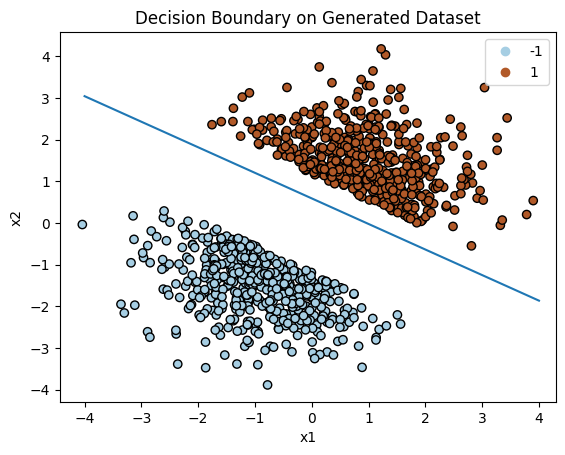

Accuracy =  100.0 %


In [112]:
# plot the decision boundary
x1 = np.linspace(-4, 4, 100)
x2 = -(w[0] * x1 + w[2]) / w[1]
plt.plot(x1, x2)
scatter = plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.legend(handles=scatter.legend_elements()[0], labels=["-1", "1"])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary on Generated Dataset")
plt.show()

# print accuracy
# x_test = torch.cat((x, torch.ones(x_test.shape[0], 1)), dim=1)
y_pred = torch.sign(x @ w)
print("Accuracy = ", (torch.sum(y_pred == y) / y.shape[0]).item() * 100, "%")

# Q3

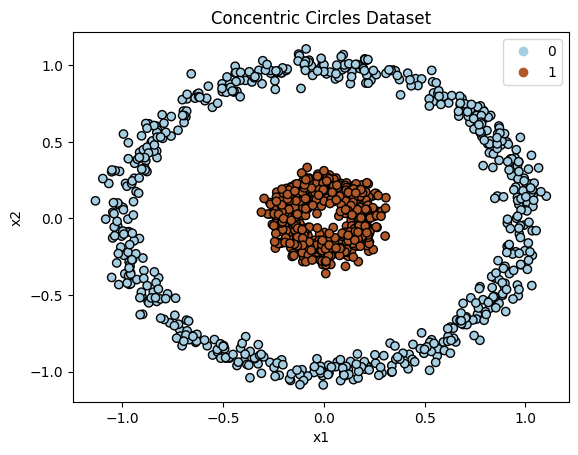

Percentage of 0 labels:  0.5
Percentage of 1 labels:  0.5


In [128]:
# create dataset with concentric circles
# import sklearn.datasets as skdata
from sklearn.datasets import make_circles
from sklearn.utils import shuffle

def create_concentric_dataset(n_samples, factor=0.9, noise=0.05):
    radius = np.random.rand(n_samples) * factor
    angle = np.random.rand(n_samples) * 2 * np.pi
    
    dataset = np.column_stack((radius * np.cos(angle), radius * np.sin(angle))) + np.random.normal(0, noise, (n_samples, 2))
    
    labels = np.zeros(n_samples)
    labels[radius > factor / 2] = 1
    
    return dataset, labels
    
def create_concentric_dataset_2(n_samples, factor=0.9, noise=0.05, outer_rad=1.0):
    inner_rad = outer_rad * factor
    num_samples = n_samples // 2
    angles = np.random.rand(num_samples) * 2 * np.pi
    
    outer_data = np.column_stack((outer_rad * np.cos(angles), outer_rad * np.sin(angles))) + np.random.normal(0, noise, (num_samples, 2))
    inner_data = np.column_stack((inner_rad * np.cos(angles), inner_rad * np.sin(angles))) + np.random.normal(0, noise, (num_samples, 2))
    
    dataset = np.concatenate((outer_data, inner_data))
    label = np.zeros(n_samples)
    label[num_samples:] = 1
    
    return dataset, label
    
    
x, y = create_concentric_dataset_2(n_samples=1250, factor=0.2, noise=0.05)
x, y = shuffle(x, y)
scatter = plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('Concentric Circles Dataset')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(handles=scatter.legend_elements()[0], labels=["0", "1"])
plt.show()

print("Percentage of 0 labels: ", (y == 0).sum().item() / len(y))
print("Percentage of 1 labels: ", (y == 1).sum().item() / len(y))

In [129]:
print(x.shape)
print(y.shape)
x = torch.from_numpy(x).float()
y = torch.from_numpy(y).float()

x_train, y_train, x_test, y_test = split_dataset(x, y, 0.8)
print("Shape of Training x: ", x_train.shape)
print("Shape of Training y: ", y_train.shape)

(1250, 2)
(1250,)
Shape of Training x:  torch.Size([1000, 2])
Shape of Training y:  torch.Size([1000])


In [130]:
# Create MLP with 1 hidden layer from scratch
class MLP:
    def __init__(self, x, y, hidden_size=4, lr=0.1) -> None:
        self.x = x
        self.y = y
        self.input_size = x.shape[1]
        self.hidden_size = hidden_size
        self.output_size = 1
        self.lr = lr
        
        # Weights and Biases
        self.w1 = torch.randn(self.input_size, self.hidden_size)
        # print("w1: ",self.w1.shape)
        self.b1 = torch.randn(1) * torch.randn(self.hidden_size) 
        # print("b1: ",self.b1.shape)
        self.w2 = torch.randn(self.hidden_size, self.output_size)
        # print("w2: ",self.w2.shape)
        self.b2 = torch.randn(1)
        
    
    # Signmoid Activation Function
    def sigmoid(self, x):
        return 1 / (1 + torch.exp(-x))
    
    # Signmoid Derivative
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    # Hinge Loss Function
    def hinge_loss(self, y_pred, y):
        # print(y_pred.shape)
        # print(y.shape)
        # print((y_pred * y).shape)
        return torch.max(torch.zeros_like(y_pred), 1 - y_pred * y)
    
    # Square Loss Function
    def square_loss(self, y_pred, y):
        return (y_pred - y) ** 2
    
    # Hinge Loss Derivative
    def hinge_loss_derivative(self, y_pred, y):
        # print(y_pred.shape)
        # print(y.shape)
        return -y * (y * y_pred < 1)
    
    # Square Loss Derivative
    def square_loss_derivative(self, y_pred, y):
        return 2 * (y_pred - y)
    
    # Binary Cross Entropy Loss Function
    def binary_cross_entropy(self, y_pred, y):
        return - y * torch.log(y_pred) - (1 - y) * torch.log(1 - y_pred)
    
    # Binary Cross Entropy Loss Derivative
    def binary_cross_entropy_derivative(self, y_pred, y):
        return  -(y / y_pred) + ((1 - y) / (1 - y_pred))
    
    # Forward Propagation
    def forward(self, x):
        self.z1 = x @ self.w1 + torch.Tensor.repeat(self.b1, x.shape[0], 1)
        # print("z1: ",self.z1.shape)
        
        self.a1 = self.sigmoid(self.z1)
        # print("a1: ",self.a1.shape)
        
        self.z2 = self.a1 @ self.w2 + self.b2
        # print("z2: ",self.z2)
        
        self.a2 = self.sigmoid(self.z2)
        # print("a2: ",self.a2)
        
        # print("w2: ",self.w2)
        # print("w1: ",self.w1)
        return self.a2
    
    # Backward Propagation
    def backward(self, x, y):
        y = y.reshape(-1, 1)
        # print("x shape: ", x.shape)
        
        self.loss_a2 = self.binary_cross_entropy(self.a2, y)
        # print("Loss_a2 shape: ", self.loss_a2.shape)
        
        # Calculate Gradients
        self.dL_d_a2 = self.binary_cross_entropy_derivative(self.a2, y)
        # print("dL_d_a2 shape: ", self.dL_d_a2.shape)
        
        self.da2_dz2 = self.sigmoid_derivative(self.a2)
        # print("da2_dz2 shape: ", self.da2_dz2.shape)
        
        self.dz2_d_w2 = self.a1.T
        # print("dz2_d_w2 shape: ", self.dz2_d_w2.shape)
        
        self.dz2_d_b2 = torch.ones_like(self.z2)
        # print("dz2_d_b2 shape: ", self.dz2_d_b2.shape)

        self.dL_d_w2 = self.dz2_d_w2 @ (self.dL_d_a2 * self.da2_dz2)
        # print("dL_d_w2 shape: ", self.dL_d_w2.shape)
        
        # self.dL_d_b2 = (self.dz2_d_b2 * (self.dL_d_a2.T @ self.da2_dz2)).reshape(-1)
        self.dL_d_b2 = ((self.dL_d_a2 * self.da2_dz2).T @ self.dz2_d_b2).reshape(-1)
        # print("dL_d_b2 shape: ", self.dL_d_b2.shape)
        
        self.da1_dz1 = self.sigmoid_derivative(self.a1)
        # print("da1_dz1 shape: ", self.da1_dz1.shape)
        
        self.dz1_dw1 = x
        # print("dz1_dw1 shape: ", self.dz1_dw1.shape)
        
        self.dz1_x = self.w1
        
        self.dz2_d_a1 = self.w2
        
        # print("dz2_d_a1 shape: ", self.dz2_d_a1.shape)
        # print("dz1_x shape: ", self.dz1_x.shape)
        # self.dz1_d_b1 = torch.ones_like(self.a1)
        # print("dz1_d_b1 shape: ", self.dz1_d_b1.shape)
        
        # print("ter: ", ((self.dL_d_a2 * self.da2_dz2) @ self.w2.T).shape)
        self.dL_dw1 =  self.dz1_dw1.T @ (((self.dL_d_a2 * self.da2_dz2) @ self.w2.T) * self.da1_dz1)
        
        # print("dL_dw1 shape: ", self.dL_dw1.shape)
        # print("ter ",(((self.dL_d_a2 * self.da2_dz2) @ self.w2.T) @ self.da1_dz1.T).shape)
        # print((((self.dL_d_a2 * self.da2_dz2).T @ (self.da1_dz1 * self.dz1_d_b1))).T.shape)
        # print("ter ",(((self.dL_d_a2 * self.da2_dz2) @ self.w2.T) * self.da1_dz1).shape)
        self.dL_db1 = (((self.dL_d_a2 * self.da2_dz2) @ self.w2.T) * self.da1_dz1).sum(axis=0)
        
        # print("dL_db1 shape: ", self.dL_db1.shape)
        
        # Updating Weights and Biases
        self.w2 -= self.lr * self.dL_d_w2
        self.b2 -= self.lr * self.dL_d_b2
        self.w1 -= self.lr * self.dL_dw1
        self.b1 -= self.lr * self.dL_db1
        
        
    # Training the Model
    def train(self, epochs=100):
        loss = []
        for epoch in range(epochs):
            self.forward(self.x)
            # print("W1 in forward: ", self.w1)
            # print("W2 in forward: ", self.w2)
            # print("B2 in forward: ", self.b2)
            # print("A2 in forward: ", self.a2)
            self.backward(self.x, self.y)
            # print("W1 in backward: ", self.w1)
            # print("W2 in backward: ", self.w2)
            # print("B2 in backward: ", self.b2)

            loss.append(self.loss_a2.mean())
            if epoch % 10 == 0:
                print("Epoch: ", epoch, " Loss: ", self.loss_a2.mean())
        # print("Final Predicted: ", self.forward(self.x))
        # print("Ground Truth: ", self.y)
        # print("z2: ", self.z2)
        
        # Plotting the Loss Curve
        plt.figure(figsize=(20, 5))
        plt.xticks(np.arange(0, epochs + 10, 10))
        plt.plot(loss)
        plt.xlim(-1, epochs)
        plt.ylim(min(loss), max(loss) + 0.1)
        plt.yticks(np.arange(0, max(loss) + 0.1, 0.1))
        plt.title("Loss vs Epochs")
        plt.show()
        return    
        
    def predict(self, x, threshold=0.5):
        predicted = self.forward(x)
        # print(torch.round(predicted))
        # apply threshold of 0.6 for label
        # print(predicted)
        
        return predicted > threshold

    
    def accuracy(self, x, y):
        # print(self.predict(x).shape)
        y = y.reshape(-1, 1)
        return torch.sum(self.predict(x) == y) / y.shape[0]


Epoch:  0  Loss:  tensor(0.7126)
Epoch:  10  Loss:  tensor(1.1197)
Epoch:  20  Loss:  tensor(1.0092)
Epoch:  30  Loss:  tensor(0.7037)
Epoch:  40  Loss:  tensor(0.5928)
Epoch:  50  Loss:  tensor(0.5381)
Epoch:  60  Loss:  tensor(0.3211)
Epoch:  70  Loss:  tensor(0.2773)
Epoch:  80  Loss:  tensor(0.2440)
Epoch:  90  Loss:  tensor(0.1625)
Epoch:  100  Loss:  tensor(0.0866)
Epoch:  110  Loss:  tensor(0.0527)
Epoch:  120  Loss:  tensor(0.0375)
Epoch:  130  Loss:  tensor(0.0291)
Epoch:  140  Loss:  tensor(0.0239)
Epoch:  150  Loss:  tensor(0.0203)
Epoch:  160  Loss:  tensor(0.0177)
Epoch:  170  Loss:  tensor(0.0157)
Epoch:  180  Loss:  tensor(0.0141)
Epoch:  190  Loss:  tensor(0.0128)


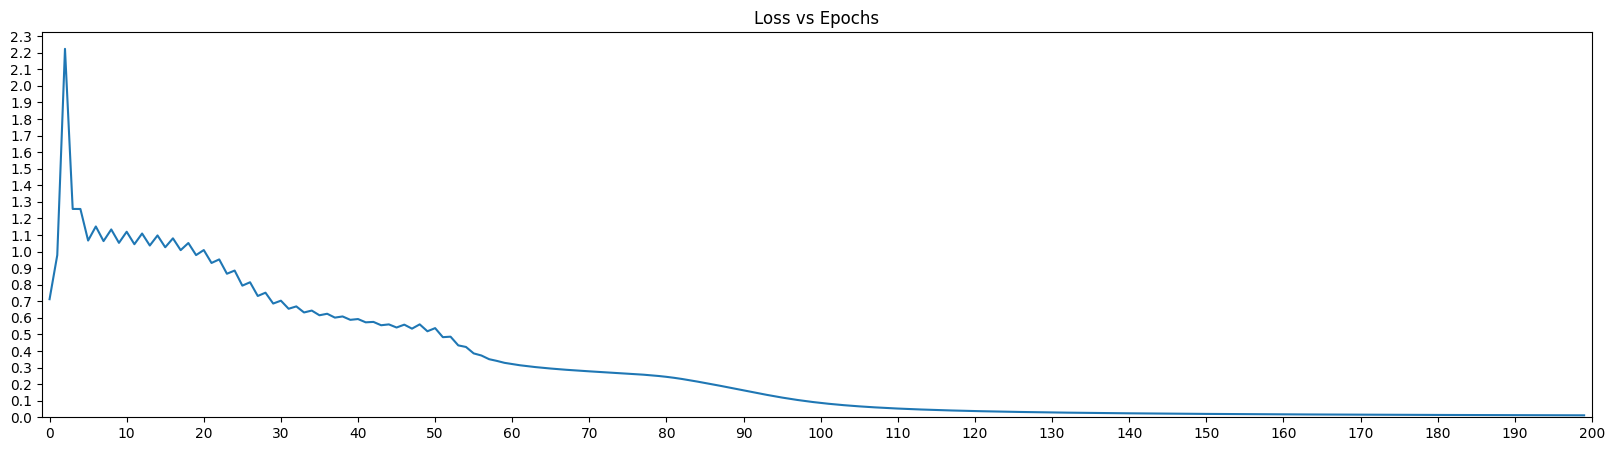

Accuracy on Test set:  100.0 %
Accuracy on Training set:  100.0 %


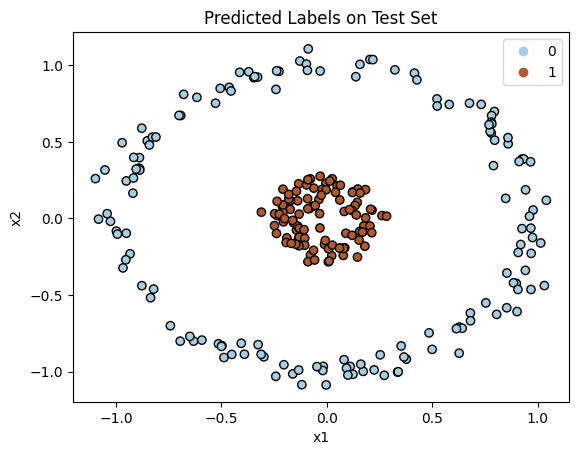

In [132]:
# create MLP
mlp = MLP(x_train, y_train, hidden_size=4, lr=0.01)
mlp.train(epochs=200)

print("Accuracy on Test set: ", mlp.accuracy(x_test, y_test).item() * 100, "%")
print("Accuracy on Training set: ", mlp.accuracy(x_train, y_train).item() * 100, "%")

# plot the predicted labels on the test set
scatetr = plt.scatter(x_test[:, 0], x_test[:, 1], c=mlp.predict(x_test).detach().numpy(),  cmap=plt.cm.Paired, edgecolors='k')
plt.legend(handles=scatetr.legend_elements()[0], labels=['0', '1'])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Predicted Labels on Test Set")
plt.show()

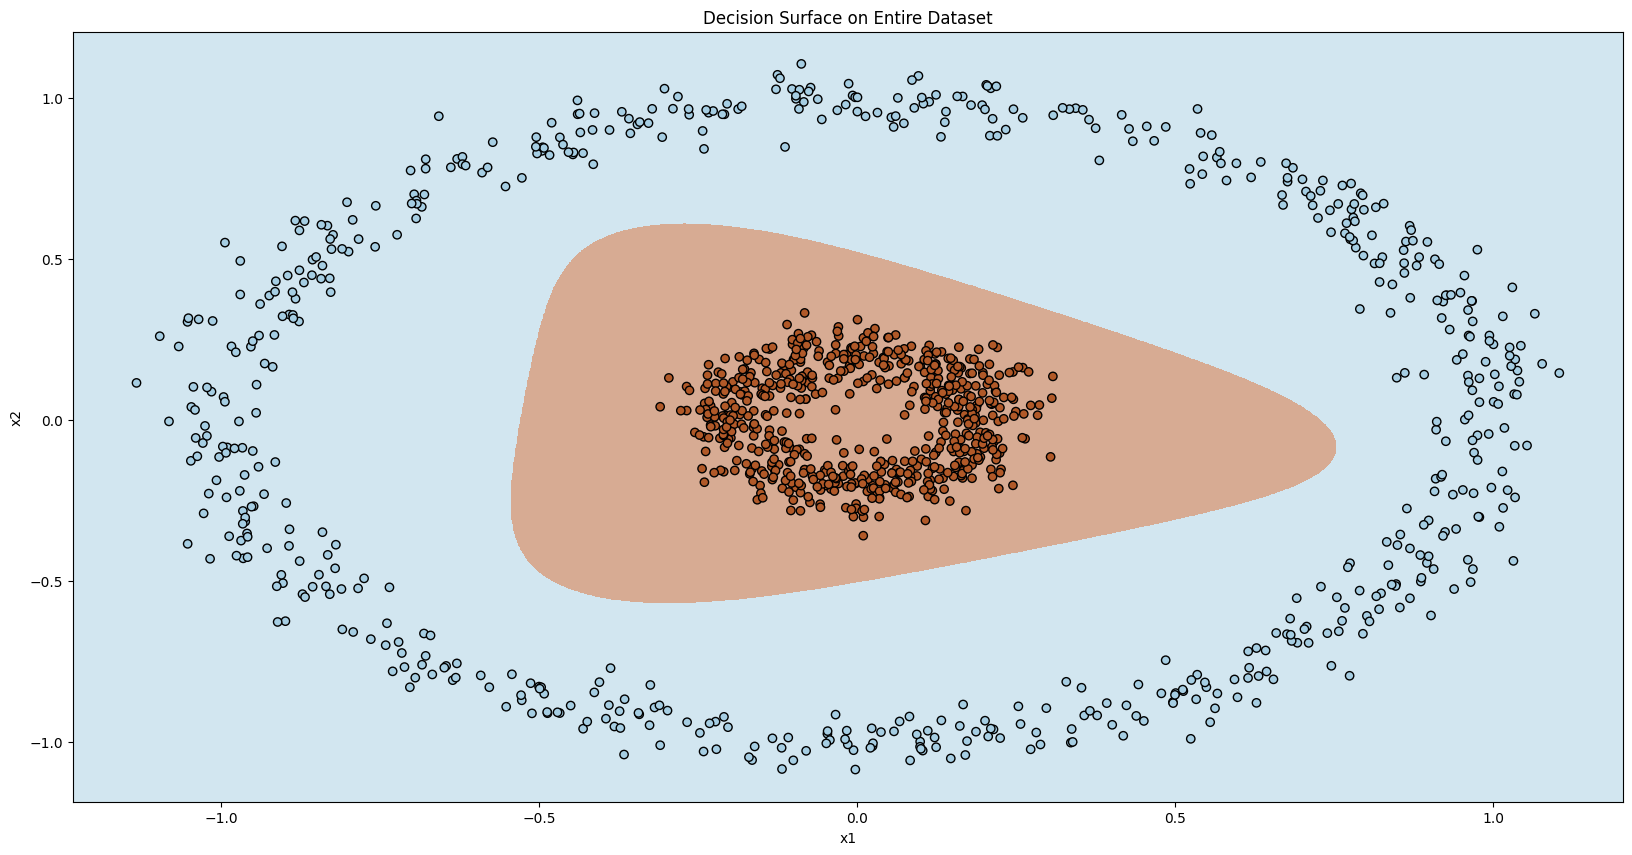

Accuracy on Entire Dataset:  100.0 %


In [133]:
# # Plot decision surface for MLP model on entire dataset

x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1

x1_grid, x2_grid = np.mgrid[x1_min.item():x1_max.item():0.001, x2_min.item():x2_max.item():0.001]
# print(x1_grid.shape, x2_grid.shape)
x_mesh = np.array([x1_grid.flatten(), x2_grid.flatten()]).T
y_mesh = (mlp.predict(torch.from_numpy(x_mesh).float()).detach().numpy()).reshape(x1_grid.shape)

plt.figure(figsize=(20, 10))
plt.title("Decision Surface on Entire Dataset")
plt.xlabel("x1")
plt.ylabel("x2")
plt.pcolormesh(x1_grid, x2_grid, y_mesh, cmap=plt.cm.Paired, alpha=0.5)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xlim(x[:, 0].min() - 0.1, x[:, 0].max() + 0.1)
plt.ylim(x[:, 1].min() - 0.1, x[:, 1].max() + 0.1)
plt.show()

# print accuracy on entire dataset
print("Accuracy on Entire Dataset: ", mlp.accuracy(x, y).item() * 100, "%")